In [1]:
import pathlib
import tensorflow_docs.plots
import tensorflow_docs.modeling

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_docs as tfdocs

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# AutoMPG Dataset

dataset_path = keras.utils.get_file("auto-mpg.data", \
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

32768/30286 [================================] - 0s 7us/step


In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names = column_names,
                      na_values = "?", comment = '\t',
                      sep=" ", skipinitialspace = True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
# check for NA rows

dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
# Drop NA rows

dataset = dataset.dropna()

In [6]:
# Convert to one hot encode for country of origin 

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [7]:
dataset = pd.get_dummies(dataset, prefix = '', prefix_sep = '')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [8]:
train_dataset = dataset.sample(frac = 0.8,random_state = 42)
test_dataset = dataset.drop(train_dataset.index)

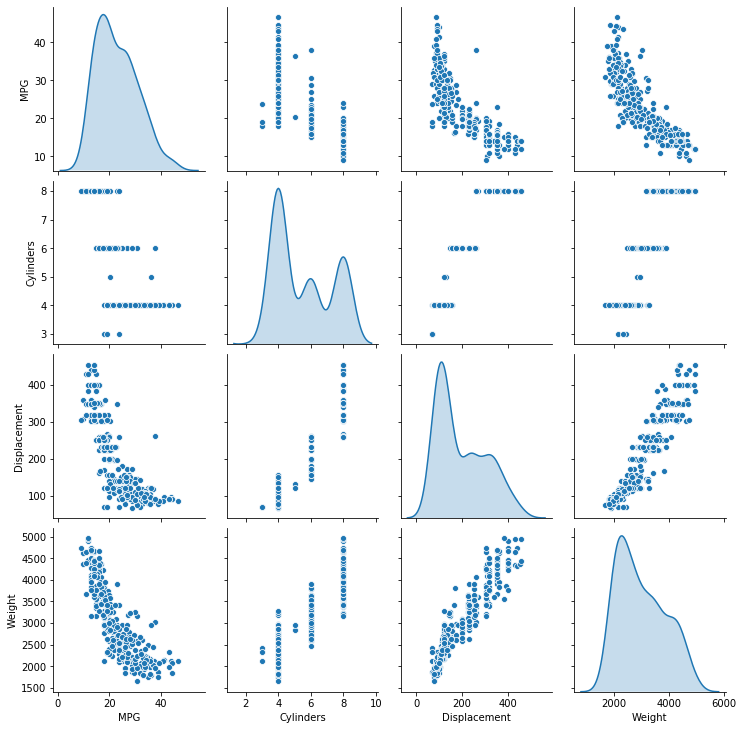

In [9]:
# Plot dataset cols

sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind = "kde")

In [10]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.531847,1.729449,3.0,4.000,4.0,8.00,8.0
Displacement,314.0,197.855096,106.501896,68.0,105.000,151.0,302.00,455.0
Horsepower,314.0,105.971338,39.636557,46.0,76.000,95.0,130.00,230.0
Weight,314.0,3005.745223,859.060925,1649.0,2231.000,2831.5,3641.75,4955.0
Acceleration,314.0,15.510828,2.803560,8.0,13.625,15.5,17.00,24.8
Model Year,314.0,75.910828,3.688989,70.0,73.000,76.0,79.00,82.0
Europe,314.0,0.171975,0.377961,0.0,0.000,0.0,0.00,1.0
Japan,314.0,0.203822,0.403481,0.0,0.000,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.000,1.0,1.00,1.0


In [11]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [12]:
# Standard Scaler

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)